# Self-Driving Car Engineer Nanodegree

## Traffic Light Detection

## Dependencies

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import glob
%matplotlib inline

## First, I tested and debugged a couple of functions to properly detect circles so I could create a class later.

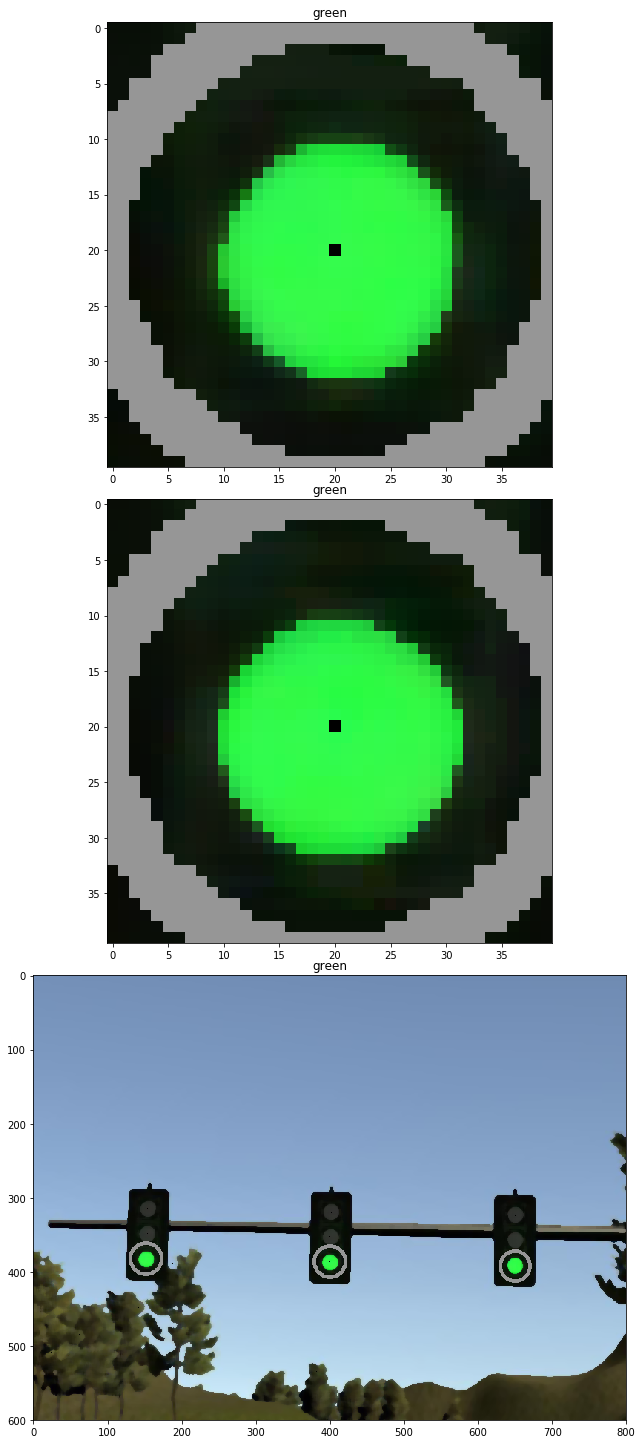

In [22]:
img = plt.imread("trafficgreen.jpeg",0)
#img = plt.imread("trafficred.jpeg",0)
#img = plt.imread("trafficorange.jpeg",0)
#img = plt.imread("camerared.jpeg",0)
#img = plt.imread("trafficgreen.jpeg",0)
#img = plt.imread("3light.jpg",0)
original = img
#
#img = cv2.medianBlur(img,9)
#cimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#image brightness
def decrease_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] -= value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

#kernel = np.ones((5,5),np.float32)/22#/15 //22 kamerára 15 simre
#kernel = np.ones((4,4),np.float32)/6#mindenmásrajó csak kamerára nem
#img = cv2.filter2D(img,-1,kernel)
img = cv2.medianBlur(img,7)
#img = decrease_brightness(img,47)


#img = cv2.bitwise_not(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

output = img.copy()

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5,param1=170,param2=10,minRadius=4,maxRadius=14)


'''
#well working
kernel = np.ones((6,6),np.float32)/15
gray = cv2.filter2D(gray,-1,kernel)
'''
#plt.imshow(gray, cmap='gray')
# ensure at least some circles were found
def orange(rgb):
    return rgb[0]>225 and rgb[1]>100 and rgb[2]<160
def green(rgb):
    r=int(rgb[0])
    g=int(rgb[1])
    b=int(rgb[2])
    return (g-r > 40) and(g-b > 40)
def red(rgb):
    r=int(rgb[0])
    g=int(rgb[1])
    b=int(rgb[2])
    return (r-g > 40) and (r-b > 40)

h,w = img.shape[:2]
images=[]
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    index = 0
    for (x, y, r) in circles:
        
        rectX = (x - r) 
        rectY = (y - r)
        #print(img[x+30,y+30])
        
        #print(crop_img[7,7])
        #print(index)
        h-=1
        w-=1
        
        if x-r+3>=w or y-r+3>=h:
            continue
            #a = 3
        rgb = original[y-r+1,x-r+3]
        
        #rgb = original[h-((y+r)%h),w-((x+r)%w)]#simulator
        rgb2 = original[y,x]
        #rgb = img[y+10,x+10] #on all
        #rgb = img[y+7,x-7] #on all
        #rgb2 = img[y-1,x-7]
        #print (rgb)
        crSize = 20
        if orange(rgb) or orange(rgb2):
            #cv2.rectangle(output, (x+r-1, y-r+3), (x+r-1, y-r+3), (0, 0, 0), -1)
            cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
            crop_img = output[y-crSize:y+crSize, x-crSize:x+crSize]
            #crop_img = img[y:(y+1*(r)), x:(x+1*(r))]
            #ax1[index].set_title("orange")
            #ax1[index].imshow(crop_img)
            images.append([crop_img,"orange"])
            #print(rgb)
            #print(r,"radius")
            #print("orange")
            cv2.circle(output, (x, y), r+10, (150, 150, 150), 4)
            
            index+=1
        elif green(rgb) or green(rgb2):
            cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
            crop_img = output[y-crSize:y+crSize, x-crSize:x+crSize]
            images.append([crop_img,"green"])
            #print(original[y,x])
            #ax1[index].set_title("green")
            #ax1[index].imshow(crop_img)
            #print("green")
            #print(rgb)
            cv2.circle(output, (x, y), r+10, (150, 150, 150), 4)
            
            index+=1  
        elif red(rgb) or red(rgb2):
            cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
            crop_img = output[y-crSize:y+crSize, x-crSize:x+crSize]
            images.append([crop_img,"red"])
            #print(original[y,x])
            #crop_img = img[y:(y+1*(r)), x:(x+1*(r))]
            #print (rgb)
            #ax1[index].set_title("red")
            #ax1[index].imshow(crop_img)
            #print(r,"radius")
            #print("red")
            #print(original[y,x])
            cv2.circle(output, (x, y), r+10, (150, 150, 150), 4)
            index+=1
        else:
            a=0
            #print(rgb)
        
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
        #num = 1
        #cv2.rectangle(output, (x, y), (x, y), (0, 128, 255), -1)
        
# show the output image
if len (images)<1:
    print("None")
elif(True):
#ax1[index].imshow(output)
#'''
    s = 3
    if len(images) > 1:
        s = len(images)
    #print(s)
    f, ax1 = plt.subplots(s, 1, figsize=(20, 20))
    f.tight_layout()
    ind=0
    for i in images:
        ax1[ind].imshow(i[0])
        ax1[ind].set_title(i[1])
        ind+=1
        
plt.imshow(output)



          

## The final version of the Traffic Light detector

Detected Light color is : red
Elapsed Time between detection start and end: 0.012816190719604492 millisec.
Reference Image below


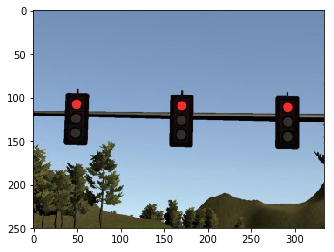

In [29]:
import time
class LightDetector():
    
    def yellow(self,rgb):
        return rgb[0]>225 and rgb[1]>100 and rgb[2]<160
    
    def green(self,rgb):
        r=int(rgb[0])
        g=int(rgb[1])
        b=int(rgb[2])
        return (g-r > 40) and(g-b > 40)
    
    def red(self,rgb):
        r=int(rgb[0])
        g=int(rgb[1])
        b=int(rgb[2])
        return (r-g > 40) and (r-b > 40)
    
    def getColor(self,img):
        output = img.copy()
        
    def getCircles(self,img,camera):
        original=img
        kernel = None #/15 //22 kamerára 15 simre
        #kernel = np.ones((4,4),np.float32)/6#mindenmásrajó csak kamerára nem
        
        if camera:
            #img = self.decrease_brightness(img,60)
            img = cv2.medianBlur(img,7)
            #kernel = np.ones((4,4),np.float32)/16
        else:
            img = cv2.medianBlur(img,7)
            #kernel = np.ones((5,5),np.float32)/22
        #img = cv2.bitwise_not(img)
        #img = cv2.filter2D(img,-1,kernel)
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if camera:
            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5,param1=170,param2=10,minRadius=4,maxRadius=14)
        else:
            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5,param1=170,param2=18,minRadius=0,maxRadius=30)
        return circles,img,original
    def printImages(self,images):
            if len (images)<1:
                print("None")
            else:
                s = len(images)
                s+=1
                f, ax1 = plt.subplots(s, 1, figsize=(20, 20))
                f.tight_layout()
                ind=0
                for i in images:
                    ax1[ind].imshow(i[0])
                    ax1[ind].set_title(i[1])
                    ind+=1
                    
    def decrease_brightness(self,img, value=30):
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] -= value

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    def drawCirclesAndGetImages(self,img,camera=False,withImage=False):
        circles,gray,original = self.getCircles(img,camera)
        output=None
        if withImage:
            output = gray.copy()
        h,w = img.shape[:2]
        images=[]
        if circles is not None:
            # convert the (x, y) coordinates and radius of the circles to integers
            circles = np.round(circles[0, :]).astype("int")
            # loop over the (x, y) coordinates and radius of the circles
            for (x, y, r) in circles:
                if(y>=h or x>=w):
                    continue
                rgb = original[y,x]
                #rgb2 = original[y,x] optional 
                
                crSize = 20
                if self.yellow(rgb):# or self.orange(rgb2):
                    #cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
                    if(withImage):
                        crop_img = img[y-crSize:y+crSize, x-crSize:x+crSize]
                        images.append([crop_img,"yellow"])
                    else:
                        images.append([None,"yellow"])
                    #cv2.circle(output, (x, y), r+10, (150, 150, 150), 4)
                elif self.green(rgb):# or self.green(rgb2):
                    #cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
                    if(withImage):
                        crop_img = img[y-crSize:y+crSize, x-crSize:x+crSize]
                        images.append([crop_img,"green"])
                    else:
                        images.append([None,"green"])
                    #cv2.circle(output, (x, y), r+10, (150, 150, 150), 4) 
                elif self.red(rgb):# or self.red(rgb2):
                    #cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
                    if(withImage):
                        crop_img = img[y-crSize:y+crSize, x-crSize:x+crSize]
                        images.append([crop_img,"red"])
                    else:
                        images.append([None,"red"])
                    break#if red found one enough
                    

                # draw the circle in the output image, then draw a grey rectangle
                #cv2.circle(output, (x, y), r+10, (150, 150, 150), 4)
                #corresponding to the center of the circle
                #cv2.rectangle(output, (x, y), (x, y), (0, 0, 0), -1)
        return images,output
    def getLightColor(self,images):
        result = "green"
        for (image,name) in images:
            if name=="red":
                return "red"
            elif name=="yellow":
                result="yellow"

        return result
    
ld=LightDetector()

img = plt.imread("trafficred.jpeg",0)

startTime = time.time()

images,output = ld.drawCirclesAndGetImages(img,True)

'''
img2=images[1][0]
img2 = cv2.medianBlur(img2,5)
grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
c = cv2.HoughCircles(grey, cv2.HOUGH_GRADIENT,1,5,param1=170,param2=17,minRadius=0,maxRadius=30)


if c is not None:
    print(len(c))
    c = np.round(c[0, :]).astype("int")
    for (x, y, r) in c:
        cv2.circle(img2, (x, y), r+4, (150, 150, 150), 1)
plt.imshow(img2)
'''
print("Detected Light color is :",ld.getLightColor(images))
elapsedTime = time.time() - startTime
print("Elapsed Time between detection start and end:",elapsedTime, "millisec.")
print("Reference Image below")
plt.imshow(img)



### Test detection on every color of traffic light.

In [33]:
ld=LightDetector()
test = ['red','yellow','green']
result = []
testImages = []
testImages.append(plt.imread("trafficred.jpeg",0))
testImages.append(plt.imread("trafficorange.jpeg",0))
testImages.append(plt.imread("trafficgreen.jpeg",0))

for img in testImages:
    images,output = ld.drawCirclesAndGetImages(img,True)
    result.append(ld.getLightColor(images))
for i in range(len(test)):
    print("Detected:",result[i],", Expected:",test[i])

Detected: red , Expected: red
Detected: yellow , Expected: yellow
Detected: green , Expected: green


# Another option would have been to create a neural network to locate and classify lamps.

### Process data to Image Detector and Classifier Neural Network
First you should download the Bosch's dataset from : https://hci.iwr.uni-heidelberg.de/content/bosch-small-traffic-lights-dataset

finished


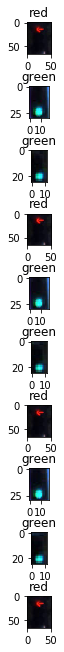

In [2]:
'''
#function to draw points on an image
def markerDotHelper(points,image):
    #https://stackoverflow.com/questions/55545400/how-to-draw-a-point-in-an-image-using-given-coordinate
    plt.imshow(image)
    #plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
    plt.scatter(points[:, 0], points[:, 1], marker="o", color="yellow", s=10)
    plt.show()

fileP = open('imagesGraySaled.p', 'wb')
fileNames = []
data=[]
with open('data/day/frameAnnotationsBOX.csv', 'r') as f:
    for line in f.readlines()[1:]:
        d = line.strip().split(';')
        fileNames.append(d)
        
for currentFile in fileNames:
    path, file = os.path.split(currentFile[0])
    img = plt.imread("data/day/frames/"+file)
    x_min = int(currentFile[2])
    y_min = int(currentFile[3])
    x_max = int(currentFile[4])
    y_max = int(currentFile[5])
    crpooedImg = img[y_min:y_max, x_min:x_max]

    resized = cv2.resize(crpooedImg, (32,32), interpolation = cv2.INTER_AREA)
    h,w = crpooedImg.shape[:2]
    if(currentFile[1]=='go'):
        data.append([crpooedImg,"green"])
    else:
        data.append([crpooedImg,"red"])


# dump information to that file
pickle.dump(data, fileP)
# close the file
fileP.close()
#Read the writed data
file2 = open('imagesGraySaled.p', 'rb')
f, ax1 = plt.subplots(10, 1, figsize=(24, 9))
f.tight_layout()
image2 = pickle.load(file2)
#ax1[0].imshow(image2[0][0])
#first 10 images
for i in range(0,10):
    ax1[i].set_title(image2[i+600][1])
    ax1[i].imshow(image2[i+600][0])

file2.close()

print("finished")
'''